In [320]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [321]:
csv_file = "../build/timing.csv"

In [322]:
# Plot a particular step
def plot_step(csv_file, column='Average', tag='', step=-1, op='mean'):
    # Read
    data = pd.read_csv(csv_file)
    
    if (step >= 0):
        data = data[data['Step'] == step]
    
    if (tag != ''):
        data = data[data['Tag'] == tag]
    
    print(data)
    
    data = data.groupby(['Key','Tag'], as_index=False)
    if (op == 'mean'):
        data = data.mean()
    elif (op == 'max'):
        data = data.max()
        
    data['label'] = data['Tag'] + '-' + data['Key']

    plt.bar(data['label'], data[column])

    plt.ylabel(column + ' time (in milliseconds)')
    
    title = column + ' timings across newton iterations'
    if (step >= 0):
        title += ' for timestep ' + str(step)
    else:
        if (op == 'mean'):
            title += ' averaged'
        elif (op == 'max'):
            title += ' max'
        title += ' over all timesteps '
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

    Step      Tag         Key       Total     Average         Max  \
25     0  Default          LS    4.362920    2.181460    2.204530   
26     0  Default         CCD   21.705900   10.852900   10.901800   
27     0  Default    linsolve  232.869000  116.435000  118.061000   
28     0  Default      update   19.284100    9.642030   10.304700   
29     0  Default  post_solve    2.226190    2.226190    2.226190   
30     0  Default   pre_solve    0.001463    0.001463    0.001463   

    Num Measurements  
25                 2  
26                 2  
27                 2  
28                 2  
29                 1  
30                 1  


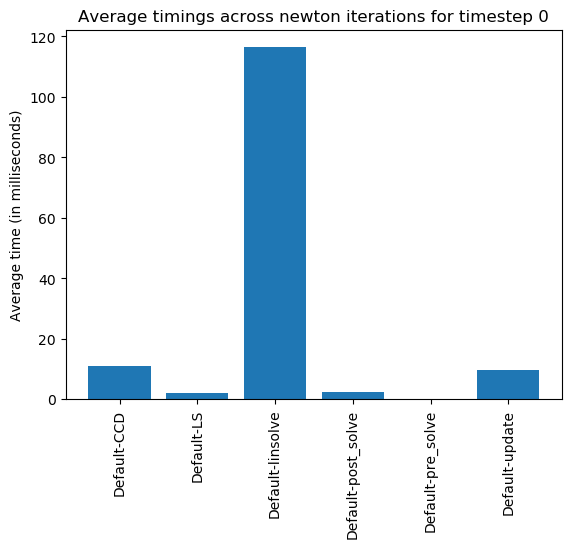

In [323]:
plot_step(csv_file, step=0, column='Average', tag='Default')

Empty DataFrame
Columns: [Step, Tag, Key, Total, Average, Max, Num Measurements]
Index: []


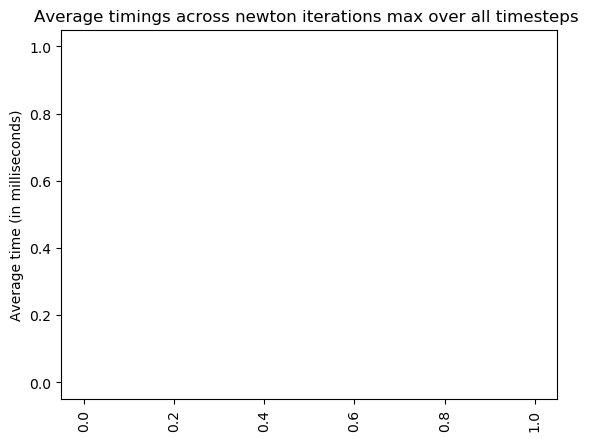

In [324]:
plot_step(csv_file, step=-1, column='Average', tag='MixedFrictionGpu',op='max')

In [325]:
# For a given CSV file, compute the average time for each key for a given
# tag. Compute these values for each timestep and plot them in a stacked
# bar chart.
def plot_data(csv_file, column='Average', tag='Default'):
    
    # Read
    data = pd.read_csv(csv_file)

    # Get number of steps in the data
    steps = data['Step'].max() + 1
    
    if (tag != ''):
        data = data[data['Tag'] == tag]
    
    # merge "post_solve" and "pre_solve" keys by summing their values for each step
    name1 = "pre_solve"
    name2 = "post_solve"

    data.loc[data['Key'] == name1, 'Average'] += data.loc[data['Key'] == name2, 'Average'].to_numpy()
    data.loc[data['Key'] == name1, 'Total'] += data.loc[data['Key'] == name2, 'Total'].to_numpy()
    data.loc[data['Key'] == name1, 'Max'] += data.loc[data['Key'] == name2, 'Max'].to_numpy()

    # remove name2
    data = data[data['Key'] != name2]
    

    # Add a label for each key
    data['label'] = data['Tag'] + '-' + data['Key']

    # Group by label
    data = data.groupby(['label'], as_index=False)

    # draw stackplot where x = steps, y = column, and each line is a key
    x = np.arange(steps)
    y = []
    labels = []
    for key, group in data:
        y.append(group[column].to_numpy())
        labels.append(key)
 
    plt.stackplot(x, y, labels=labels)
    plt.legend(loc='upper right')
    plt.show()

/tmp/ipykernel_311410/300755571.py:37: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in data:


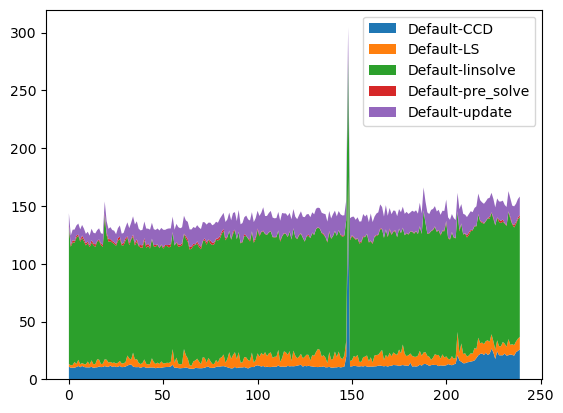

In [326]:
plot_data(csv_file, column='Max', tag='Default')

In [327]:
# Read in CSV file and report some timing statistics
# A single CSV row has the data:
# Step,Tag,Key,Total,Average,Max,Num Measurements"
# Average and max time for each key over all steps,
# Average number of iterations over all steps
# Average total time over all steps
# Maximum total time over all steps.
csv_file = "../build/timing.csv"
df = pd.read_csv(csv_file)

data = df[df['Tag'] == 'Default']

# Group by key
data_by_key = data.groupby(['Key'], as_index=False)

# Sum the totals and the Num Measurements
data_sum = data_by_key.sum(numeric_only=True)
keys = data_sum['Key']
avg  = data_sum['Total'] / data_sum['Num Measurements']

data_max = data_by_key.max()
max_time = data_max['Max']

print("Average and max time for each key over all steps")
for i in range(len(keys)):
    print(keys[i], avg[i], max_time[i])

# Get the average number of iterations over all steps
data_tmp = data.loc[data['Key'] == 'LS']

num_steps = len(data_tmp)
num_iters = data_tmp['Num Measurements'].sum()
avg_num_iters = num_iters / num_steps
print("Average number of iterations over all steps: ", avg_num_iters)
# Average and max total time
data = df[df['Tag'] == 'Optimizer']
max_time = data['Total'].max()
mean_time = data['Total'].mean()
print("Optimizer mean time: ", mean_time)
print("Optimizer max time: ", max_time)

###############################
# Read in the optimizer CSV file
csv_file = "../build/optimizer_data.csv"

df = pd.read_csv(csv_file)

# mean collision frames
print("Mean collision frames: ", df['collision_frames'].mean())
# max collision frames
print("Max collision frames: ", df['collision_frames'].max())

Average and max time for each key over all steps
CCD 10.251630467899892 156.283
LS 4.609499396082699 20.0942
linsolve 102.30539825897714 124.597
post_solve 0.9775353291666666 2.40826
pre_solve 0.00051755 0.001583
update 14.921449129488575 23.6085
Average number of iterations over all steps:  7.658333333333333
Optimizer mean time:  1014.1906791666665
Optimizer max time:  1505.2
Mean collision frames:  404.90750816104463
Max collision frames:  951
